In [1]:
posterior = "VOGN"
bound = "chernoff"

import os
import json

import pandas as pd
#df = pd.DataFrame(columns=['post', 'bound', 'index', 'label', 'pred', 'epsilon', 'p_safe_attack': 1.0, 'd_safe_attack': True, 'p_safe_bounds' , 'd_safe_bounds', 'beps', 'bdelt', 'balpha', 'iterations_attack', 'iterations_bounds', 'veri_time', 'attk_time'])
rows = []
def load(post, bound, eps=False):
    entries = []
    if(eps):
        path = "ExperimentalLogs/%s_%s.log"%(post, bound)
    else:
        path = "EpsilonLogs/%s_%s.log"%(post, bound)
    with open(path) as log_file:
        for line in log_file:
            if(json.loads(line)['epsilon'] == 0.75):
                continue
            #print(json.loads(line))
            entries.append(json.loads(line))
            entry = json.loads(line)
            entry['Posterior'] = post
            entry['Bound'] = bound
            entry['Method'] = 'Attack'
            entry['p_safe_bounds'] = entry['p_safe_attack']
            rows.append(entry)
            entry2 = json.loads(line)
            entry2['Posterior'] = post
            entry2['Bound'] = bound
            entry2['Method'] = 'Cert'
            entry2['p_safe_attack'] = entry2['p_safe_bounds']
            rows.append(entry2)
    return entries

dataset = "wine1"
log_info = load(dataset, "chernoff")
"""
log_info = load("concrete1", "chernoff")
log_info = load("yacht1", "chernoff")
log_info = load("powerplant1", "chernoff")
log_info = load("energy1", "chernoff")
log_info = load("kin8nm1", "chernoff")
log_info = load("naval1", "chernoff")
log_info = load("wine1", "chernoff")
"""

log_info = load(dataset, "chernoff", eps=True)
"""
log_info = load("concrete1", "chernoff", eps=True)
log_info = load("yacht1", "chernoff", eps=True)
log_info = load("powerplant1", "chernoff", eps=True)
log_info = load("energy1", "chernoff", eps=True)
log_info = load("kin8nm1", "chernoff", eps=True)
log_info = load("naval1", "chernoff", eps=True)
log_info = load("wine1", "chernoff", eps=True)
"""

'\nlog_info = load("concrete1", "chernoff", eps=True)\nlog_info = load("yacht1", "chernoff", eps=True)\nlog_info = load("powerplant1", "chernoff", eps=True)\nlog_info = load("energy1", "chernoff", eps=True)\nlog_info = load("kin8nm1", "chernoff", eps=True)\nlog_info = load("naval1", "chernoff", eps=True)\nlog_info = load("wine1", "chernoff", eps=True)\n'

In [2]:
df = pd.DataFrame.from_dict(rows, orient='columns')
df.head()

,index,label,pred,epsilon,p_safe_attack,d_safe_attack,p_safe_bounds,d_safe_bounds,beps,bdelt,balpha,iterations_attack,iterations_bounds,veri_time,attk_time,Posterior,Bound,Method
0,0,5.250825,5.230911,0.025,0.006623,False,0.006623,False,0.05,0.1,0.05,151.0,151.0,0.580255,16.387905,wine1,chernoff,Attack
1,0,5.250825,5.230911,0.025,0.000000,False,0.000000,False,0.05,0.1,0.05,151.0,151.0,0.580255,16.387905,wine1,chernoff,Cert
2,11,5.609540,5.558533,0.025,0.357616,False,0.357616,False,0.05,0.1,0.05,151.0,151.0,0.704582,16.629863,wine1,chernoff,Attack
3,11,5.609540,5.558533,0.025,0.000000,False,0.000000,False,0.05,0.1,0.05,151.0,151.0,0.704582,16.629863,wine1,chernoff,Cert
4,12,6.263327,6.245078,0.025,0.059603,False,0.059603,True,0.05,0.1,0.05,151.0,151.0,0.727525,19.600575,wine1,chernoff,Attack


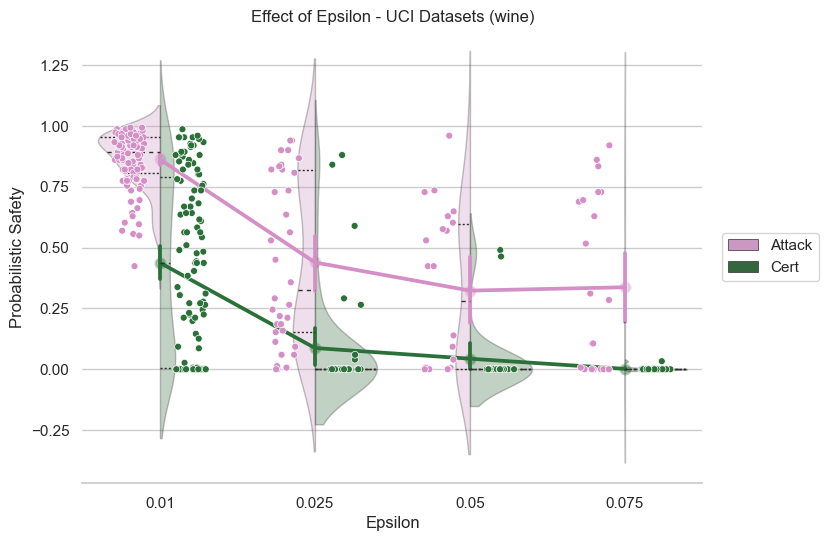

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6), dpi=100)

sns.set_theme(style="whitegrid")

#sns.boxplot(data=df, x="Posterior", y="d_safe_attack", hue="Method",
#                inner="quart", linewidth=1,
#               palette={"Attack": "b", "Cert": ".85"})


pal = sns.color_palette("cubehelix_r", 2)
sns.pointplot(x="epsilon", y="p_safe_attack", hue="Method",
                 data=df, palette=pal)

ax = sns.violinplot(data=df, x="epsilon", y="p_safe_attack", hue="Method",
               split=True, inner="quart", linewidth=1, palette=pal, plot_kws={'alpha':1.0})

for violin in ax.collections[::2]:
    violin.set_alpha(0.30)
for violin in ax.collections[::1]:
    violin.set_alpha(0.30)

sns.stripplot(x="epsilon", y="p_safe_attack", hue="Method", 
                 data=df, palette=pal, dodge=True, edgecolor='white', linewidth=0.5, jitter=0.2)

sns.despine(left=True)

plt.title("Effect of Epsilon - UCI Datasets (%s)"%(dataset[0:-1]))
plt.ylabel("Probabilistic Safety")
plt.xlabel("Epsilon")

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), bbox_to_anchor=(1.2,0.5), loc="center right")

legend_without_duplicate_labels(ax)
#plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()